In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])
print(housing.feature_names)
print(housing.data.columns.values)

# MedInc median income in block group (100k)
# HouseAge median house age in block group
# AveRooms average number of rooms per household
# AveBedrms average number of bedrooms per household
# Population block group population
# AveOccup average number of household members
# Latitude block group latitude
# Longitude block group longitude

# A block group is the smallest geographical unit for which 
# the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


## Explore the data

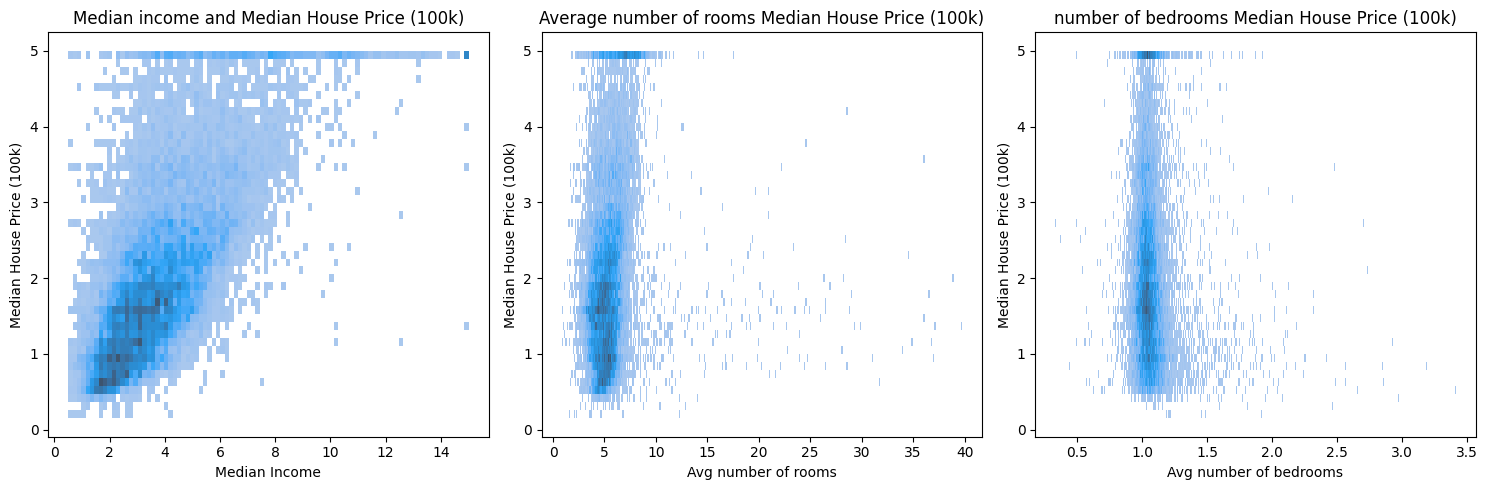

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting on each subplot
i=0
# sns.scatterplot(x="MedInc", y=housing.target, ax=axes[i], data=housing.data)
sns.histplot(x="MedInc", y=housing.target, ax=axes[i], data=housing.data)
axes[i].set_title("Median income and Median House Price (100k)")
axes[i].set_xlabel("Median Income")
axes[i].set_ylabel("Median House Price (100k)")

i=1
indices = housing.data[housing.data["AveRooms"] <40].index
# sns.histplot(x="AveRooms", y=housing.target, ax=axes[i], data=housing.data)
# sns.scatterplot(x="AveRooms", y=housing.target, ax=axes[i], data=housing.data)
sns.histplot(x="AveRooms", y=housing.target.iloc[indices], ax=axes[i], data=housing.data.iloc[indices])
axes[i].set_title("Average number of rooms Median House Price (100k)")
axes[i].set_xlabel("Avg number of rooms")
axes[i].set_ylabel("Median House Price (100k)")

i=2
indices = housing.data[housing.data["AveRooms"] <10].index
# sns.scatterplot(x="AveBedrms", y=housing.target, ax=axes[i], data=housing.data)
# sns.histplot(x="AveBedrms", y=housing.target, ax=axes[i], data=housing.data)
sns.histplot(x="AveBedrms", y=housing.target.iloc[indices], ax=axes[i], data=housing.data.iloc[indices])
axes[i].set_title("number of bedrooms Median House Price (100k)")
axes[i].set_xlabel("Avg number of bedrooms")
axes[i].set_ylabel("Median House Price (100k)")

plt.tight_layout()
plt.show()

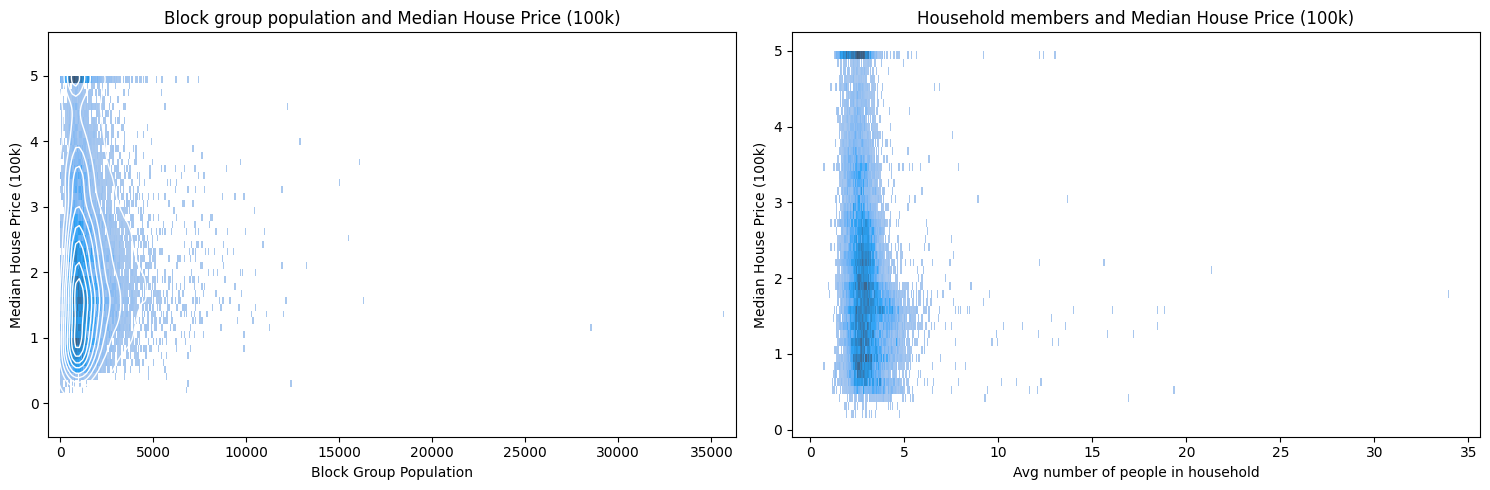

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting on each subplot
i=0
sns.histplot(x="Population", y=housing.target, ax=axes[i], data=housing.data)
# sns.kdeplot(x="Population", y=housing.target, ax=axes[i], data=housing.data, levels=5, color="w", linewidths=1)
axes[i].set_title("Block group population and Median House Price (100k)")
axes[i].set_xlabel("Block Group Population")
axes[i].set_ylabel("Median House Price (100k)")

i=1
# sns.histplot(x="AveOccup", y=housing.target, ax=axes[i], data=housing.data)
indices = housing.data[housing.data["AveOccup"] <40].index
sns.histplot(x="AveOccup", y=housing.target.iloc[indices], ax=axes[i], data=housing.data.iloc[indices])
axes[i].set_title("Household members and Median House Price (100k)")
axes[i].set_xlabel("Avg number of people in household")
axes[i].set_ylabel("Median House Price (100k)")


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Median House Price (100k)')

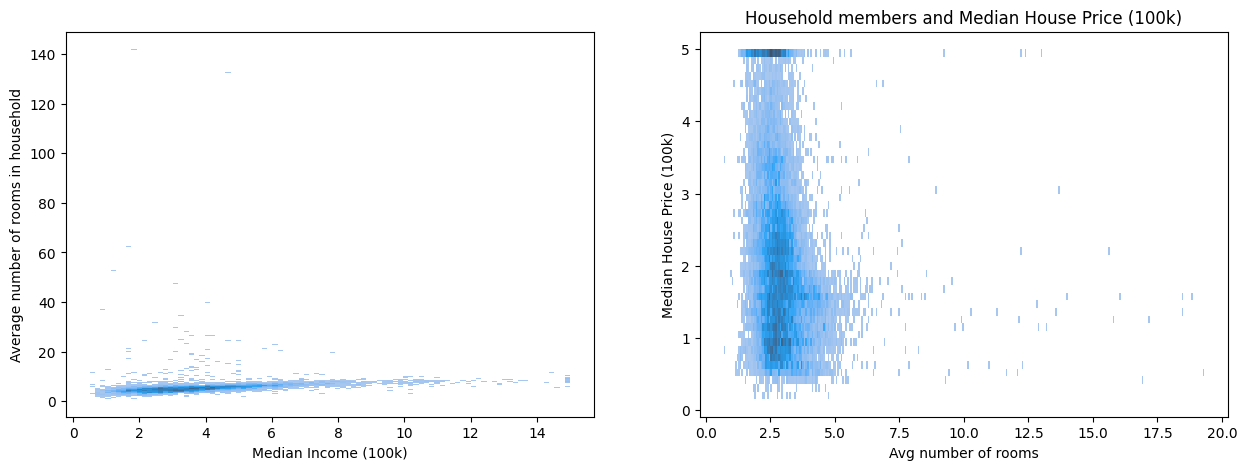

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting on each subplot
i=0

sns.histplot(x="MedInc", y="AveRooms", ax=axes[i], data=housing.data)
axes[i].set_title("")
axes[i].set_xlabel("Median Income (100k)")
axes[i].set_ylabel("Average number of rooms in household")

i=1

indices = housing.data[housing.data["AveOccup"] <20].index
sns.histplot(x="AveOccup", y=housing.target.iloc[indices], ax=axes[i], data=housing.data.iloc[indices])
# sns.scatterplot(x="AveOccup", y=housing.target, ax=axes[i], data=housing.data)
axes[i].set_title("Household members and Median House Price (100k)")
axes[i].set_xlabel("Avg number of rooms")
axes[i].set_ylabel("Median House Price (100k)")

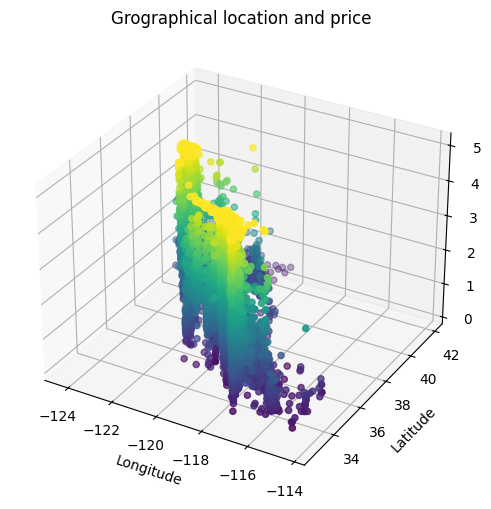

In [27]:
x = housing.data.Longitude
y = housing.data.Latitude
z = housing.target
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', data=housing.data)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('house median price')
plt.title('Grographical location and price')
plt.show()